<a href="https://colab.research.google.com/github/vivekpenuli/LLM-/blob/main/Step_2_Position_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### POSITIONAL EMBEDDINGS (ENCODING WORD POSITIONS)

<div class="alert alert-block alert-success">

Previously, we focused on very small embedding sizes in this chapter for illustration
purposes.

We now consider more realistic and useful embedding sizes and encode the input
tokens into a 256-dimensional vector representation.

This is smaller than what the original
GPT-3 model used (in GPT-3, the embedding size is 12,288 dimensions) but still reasonable
for experimentation.

Furthermore, we assume that the token IDs were created by the BPE
tokenizer that we implemented earlier, which has a vocabulary size of 50,257:

</div>

In [2]:
import torch
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [3]:
print(token_embedding_layer.weight)

Parameter containing:
tensor([[ 1.9798,  0.4718,  0.3018,  ..., -0.8129, -1.7075, -0.9832],
        [-0.6232, -1.1644, -1.7117,  ...,  0.9317, -0.7358, -1.9342],
        [ 0.9595, -0.8482,  0.5377,  ...,  1.1477, -0.2846, -1.4204],
        ...,
        [ 0.1199,  0.3097, -0.4902,  ..., -2.3955,  1.1253, -0.4718],
        [-1.2078, -1.4520,  0.3153,  ..., -0.6777,  1.5163, -1.0797],
        [ 0.0246,  0.4517,  1.8460,  ..., -0.0232,  0.3683, -0.2034]],
       requires_grad=True)


In [4]:
print(token_embedding_layer)

Embedding(50257, 256)


Now our goal is to get Vector Embeding from the above matrix.
1. As we know if i pass the token id in the "token_embedding_layer" matrix i will get the coresponding vector embedding of the token


In [5]:
# The goal is to Read File and print its content

with open('/content/demo.txt', "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20033
I. THE BASIC FEATURES OF INDIAN
PHILOSOPHY
1. The Nature of Philosophy
Like all other living beings


In [6]:

import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))


tokenizer = tiktoken.get_encoding("gpt2")

tiktoken version: 0.12.0


In [7]:

integers = tokenizer.encode(raw_text)

print(integers)

[40, 13, 3336, 29809, 2149, 18630, 47471, 3963, 24413, 16868, 198, 11909, 4146, 2640, 3185, 42598, 198, 16, 13, 383, 10362, 286, 26099, 198, 7594, 477, 584, 2877, 9791, 11, 582, 12766, 329, 6224, 13, 887, 981, 262, 198, 21037, 9791, 6531, 517, 393, 1342, 39615, 1231, 597, 6921, 1410, 290, 198, 29983, 11, 290, 670, 416, 13311, 11, 582, 3544, 262, 9098, 6979, 286, 465, 7654, 284, 198, 4625, 1481, 262, 3403, 290, 3616, 286, 262, 6531, 290, 284, 44668, 3352, 198, 392, 12834, 284, 4155, 1943, 13, 679, 12802, 284, 1085, 465, 1204, 287, 262, 1657, 286, 198, 14363, 3725, 286, 2241, 290, 262, 995, 11, 2263, 656, 9110, 407, 198, 34671, 306, 262, 7103, 2482, 286, 465, 4028, 11, 475, 772, 511, 1290, 12, 30771, 198, 1102, 3107, 3007, 13, 41042, 329, 3725, 24747, 11, 4361, 11, 422, 262, 9377, 198, 21353, 286, 582, 13, 26099, 318, 281, 2230, 284, 15959, 428, 845, 6397, 198, 8906, 557, 13, 632, 318, 407, 11, 4361, 11, 257, 5019, 13064, 11, 475, 257, 14564, 13, 1081, 281, 37820, 198, 15823, 6260, 7584,

Vector Embedding

In [9]:
token_embeddings = token_embedding_layer(torch.tensor(integers))
print(token_embeddings.shape)

torch.Size([4746, 256])


In [20]:
token_embeddings[0] # token_embeddings became a list .if we see the fitst Token Id =40 which store in o location this is the vector embedding

tensor([ 0.7513,  0.7604, -1.1898,  0.8660, -1.5251, -2.5679,  0.6939,  0.5391,
         0.2392, -1.1134, -2.0579, -0.5803, -0.1914, -1.0981,  0.3368,  0.3012,
        -0.1079,  0.2545,  2.1202,  1.7189,  0.0916, -1.7710, -0.8817,  0.1481,
         0.9126,  1.9848,  0.8548, -0.0130, -0.9092,  1.9327,  1.7334, -1.3998,
        -1.4046, -0.9861, -0.4695,  0.9120,  0.7972,  0.4847, -0.0828,  1.4031,
         2.0755, -0.9860,  1.6007,  0.0773,  0.0926,  0.0843, -0.7891, -1.4008,
        -1.1723,  0.4873, -1.0798,  3.4682,  0.9316, -0.7411,  0.1389, -0.3690,
         0.9509,  0.8585, -1.0481, -1.8872,  1.4131,  0.4775,  1.2793, -0.2585,
         2.2810, -0.2473, -0.2103,  0.0042,  0.1147,  0.6385,  0.3202, -1.3346,
         0.1770, -1.0412, -1.8841, -2.4421, -0.6619, -0.6857, -0.8758, -0.5051,
        -0.2159, -0.6790,  0.4048, -0.5208, -1.9535,  2.7415,  0.1621, -1.8191,
         0.0526,  0.7720,  1.4202,  0.1498,  0.2718,  0.8954, -0.4679, -0.2768,
         0.5424,  0.0762,  0.3483, -0.80

In [19]:
token_embedding_layer(torch.tensor([40])) # This is you embedding Matrix which store all Token vector matrix in it . See both result are same

tensor([[ 0.7513,  0.7604, -1.1898,  0.8660, -1.5251, -2.5679,  0.6939,  0.5391,
          0.2392, -1.1134, -2.0579, -0.5803, -0.1914, -1.0981,  0.3368,  0.3012,
         -0.1079,  0.2545,  2.1202,  1.7189,  0.0916, -1.7710, -0.8817,  0.1481,
          0.9126,  1.9848,  0.8548, -0.0130, -0.9092,  1.9327,  1.7334, -1.3998,
         -1.4046, -0.9861, -0.4695,  0.9120,  0.7972,  0.4847, -0.0828,  1.4031,
          2.0755, -0.9860,  1.6007,  0.0773,  0.0926,  0.0843, -0.7891, -1.4008,
         -1.1723,  0.4873, -1.0798,  3.4682,  0.9316, -0.7411,  0.1389, -0.3690,
          0.9509,  0.8585, -1.0481, -1.8872,  1.4131,  0.4775,  1.2793, -0.2585,
          2.2810, -0.2473, -0.2103,  0.0042,  0.1147,  0.6385,  0.3202, -1.3346,
          0.1770, -1.0412, -1.8841, -2.4421, -0.6619, -0.6857, -0.8758, -0.5051,
         -0.2159, -0.6790,  0.4048, -0.5208, -1.9535,  2.7415,  0.1621, -1.8191,
          0.0526,  0.7720,  1.4202,  0.1498,  0.2718,  0.8954, -0.4679, -0.2768,
          0.5424,  0.0762,  

Problem

1. LLMs never see the full text

2. They see small fixed-length windows (context length)

3. Stride controls how much we slide the window

so we get "token_embeddings" List which store all vector embedding of each token . But this is not the way we train LLM .
1. Create Training Set fOR LLM

TRAINING vs TESTING IN LLMs

1. Learning happens ONLY during training

2. During testing, the model is frozen

3. Testing is just checking behavior, not improving it

In [21]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
        assert len(token_ids) > max_length, "Number of tokenized inputs must at least be equal to max_length+1"

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [23]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

Now we create a context window which ensure how many words from the sentence will LLM see

# What it is:
The context window is the maximum number of recent tokens an LLM can look at at one time.

# What it helps with:

1. Understanding meaning – lets the model see earlier words so current words make sense.

2. Maintaining coherence – keeps references consistent (pronouns, topics, tone).

3. Long-range dependencies – connects ideas that appear far apart in text.

4. Next-token prediction – gives enough past information to predict the next word accurately.

# What it does NOT do:

1. It does not give memory beyond the window.

2. Anything outside the window is invisible to the model.

# Key tradeoff:

1. Larger window → better context understanding, higher compute cost

2.Smaller window → cheaper, but weaker long-term understanding

In [24]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[   40,    13,  3336, 29809]]), tensor([[   13,  3336, 29809,  2149]])]


# Why We Need Batches in LLM Training

What a batch is: A batch is a group of training examples processed together in one forward and backward pass.

# Why batches are used

Efficiency : -->Modern hardware (GPUs/TPUs) is built to process many examples in parallel.
Batches fully utilize this parallelism and make training much faster.

Stable learning: -> Using multiple examples together averages out noise in gradients, leading to smoother and more stable updates.

Better use of memory and compute : -> Processing one example at a time wastes compute resources; batching amortizes overhead across many samples.

# What if we don’t use batches?

1. Training becomes very slow

2. Gradients become noisy and unstable

3. Hardware is underutilized

4.Learning may oscillate or converge poorly

This is called batch size = 1 (online learning) and is usually inefficient for LLMs.

In [25]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,    13,  3336, 29809],
        [ 2149, 18630, 47471,  3963],
        [24413, 16868,   198, 11909],
        [ 4146,  2640,  3185, 42598],
        [  198,    16,    13,   383],
        [10362,   286, 26099,   198],
        [ 7594,   477,   584,  2877],
        [ 9791,    11,   582, 12766]])

Targets:
 tensor([[   13,  3336, 29809,  2149],
        [18630, 47471,  3963, 24413],
        [16868,   198, 11909,  4146],
        [ 2640,  3185, 42598,   198],
        [   16,    13,   383, 10362],
        [  286, 26099,   198,  7594],
        [  477,   584,  2877,  9791],
        [   11,   582, 12766,   329]])


What the above code did is it create Batch ,and in each batch we pass 8 context vector or 8 sample . where each sample have 4 context in it

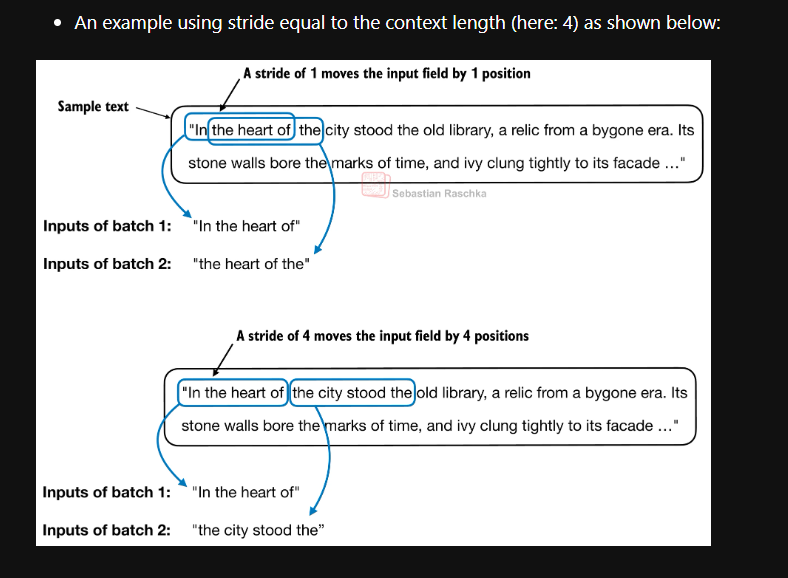

Give us first Input Batch

In [26]:
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [27]:
print("Token IDs:\n", inputs)
print("\nInputs shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,    13,  3336, 29809],
        [ 2149, 18630, 47471,  3963],
        [24413, 16868,   198, 11909],
        [ 4146,  2640,  3185, 42598],
        [  198,    16,    13,   383],
        [10362,   286, 26099,   198],
        [ 7594,   477,   584,  2877],
        [ 9791,    11,   582, 12766]])

Inputs shape:
 torch.Size([8, 4])


Now our Goal is to replace each token with vector embedding .Note we already know how to convert token id into vector embeeding

In [28]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [30]:
print(token_embeddings[0]) # This is a vector embeeding of first sample [   40,    13,  3336, 29809 ]

tensor([[ 0.7513,  0.7604, -1.1898,  ..., -0.2791, -1.8680,  1.1547],
        [ 0.5327,  0.8653,  0.7512,  ...,  0.1741,  1.2942,  0.4370],
        [-1.2092, -0.9993,  1.1470,  ..., -0.5015, -1.4697, -0.3416],
        [-1.1591,  1.0411,  1.0523,  ...,  0.1333, -1.4696,  0.9264]],
       grad_fn=<SelectBackward0>)


# Positional Embedding

In [31]:
context_length = max_length #max length is 4
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim) #utput dimesnion =256

In [36]:
print(pos_embedding_layer) # to get the value we need to pass all row index

Embedding(4, 256)


In [32]:
pos_embeddings = pos_embedding_layer(torch.arange(max_length)) # this is done to get all value from the layer. because pos_embedding_layer will not give the matrix . you need to enter the position here
print(pos_embeddings.shape)

torch.Size([4, 256])


In [35]:
print(pos_embeddings)

tensor([[-0.0512, -0.8388,  0.8451,  ..., -0.8327,  1.3011,  1.2570],
        [ 1.1302, -1.0104,  0.7098,  ..., -0.5858, -0.0430,  1.5311],
        [-0.6956, -0.5236,  0.8279,  ..., -0.7757,  0.6345, -0.0029],
        [-0.6825, -2.0911, -2.1213,  ..., -0.5502, -0.3862, -0.8193]],
       grad_fn=<EmbeddingBackward0>)


Final : Input vector to pass in GPT

In [33]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


First sample Token vector :[ 0.7513,  0.7604, -1.1898,  ..., -0.2791, -1.8680,  1.1547]

ADD

Positional embedding : [-0.0512, -0.8388,  0.8451,  ..., -0.8327,  1.3011,  1.2570]

In [34]:
print(input_embeddings[0])

tensor([[ 0.7001, -0.0784, -0.3446,  ..., -1.1118, -0.5669,  2.4117],
        [ 1.6628, -0.1452,  1.4609,  ..., -0.4117,  1.2511,  1.9681],
        [-1.9048, -1.5230,  1.9749,  ..., -1.2772, -0.8352, -0.3445],
        [-1.8416, -1.0501, -1.0690,  ..., -0.4169, -1.8558,  0.1070]],
       grad_fn=<SelectBackward0>)
